# Figures for the Report and Presentation



Primarily from the [NOIRLab API examples](https://github.com/NOAO/nat-nb/blob/master/sia.ipynb)

In [2]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.utils import data as data_utils

# version dependencies are currently an issue
import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

# import json
# import requests
from dl import authClient as ac, queryClient as qc
import pandas as pd

## FIGURE 1: Sky Coverage (Overlay the 2.3m sky coverage with the DR10 Legacy Survey)

Query All Bricks From the LS_DR10 Bricks_s Auxiliary Table

In [3]:
query = f""" 
        SELECT brickname, ra,dec
        FROM ls_dr10.bricks_s
        WHERE nexp_g >= 1
        """
all_bricks= qc.query(sql=query,fmt="pandas")

Query All Bricks with No observations in the g Filter

In [4]:
# get all the brick names and ra/dec of every brick with NO observations in the g filter

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2, nexp_g, nexp_i, nexp_r, nexp_z, wise_nobs_1, wise_nobs_2, wise_nobs_3, wise_nobs_4
        FROM ls_dr10.bricks_s
        WHERE nexp_g<1
        """

non_g_bricks = qc.query(sql=query, fmt="pandas")


In [5]:
# bricks with r band observations
r_bricks = non_g_bricks[non_g_bricks['nexp_r']!=0]
# no r band, but i band
i_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']!=0)]
# no r or i bands, but z band
z_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']!=0)]
# no r, i, or z
wise_only = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']==0)]

Almost all of the DR10 bricks have at least one g-band observation associated with them, and those that don't are mostly along the edge of the Milky Way plane and the Magellanic Clouds. Out of the ~16k bricks that aren't accounted for in the g-band, only about 2900 only have WISE (W1, W2, W3, W4) observations that would require different calibration and image processing to handle.

Difference Between Plotting All the Bricks and Plotting the Bricks by Filter 

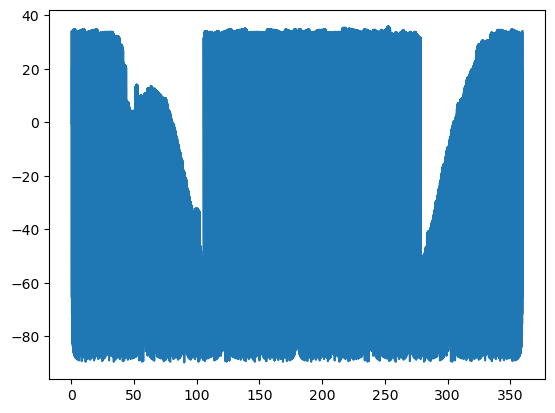

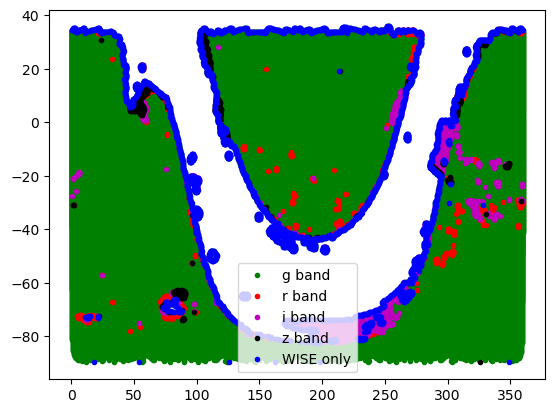

In [6]:
#fig, (ax1,ax2) = plt.subplots(1,2)
plt.figure()
plt.plot(all_bricks['ra'], all_bricks['dec'])
plt.figure()
plt.plot(all_bricks['ra'], all_bricks['dec'],'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
plt.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
plt.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
plt.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
plt.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")
plt.legend()
plt.show()

## FINAL FIGURE 1

Option 1

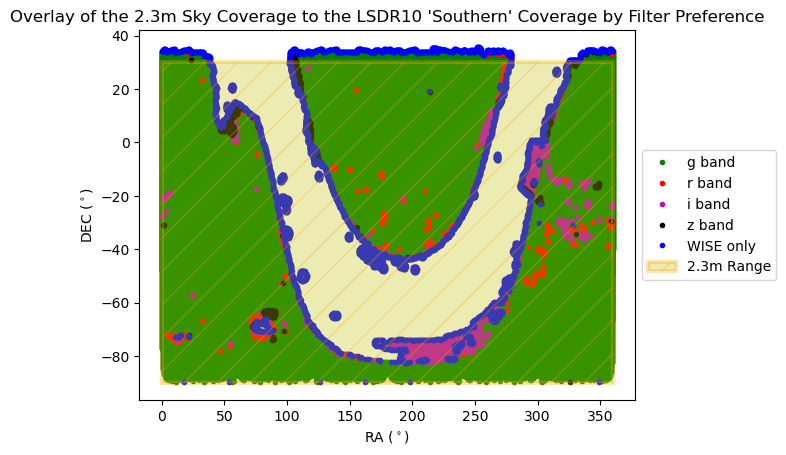

In [7]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,1)
ax.plot(all_bricks['ra'], all_bricks['dec'], 'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")
plt.gca().add_patch(Rectangle((0,-90),360,120,
                                  fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=3, zorder=100,
                                figure=fig, label="2.3m Range"))
#fig.patches.extend([plt.Rectangle((0,-90),360,120,facecolor='y',alpha=0.3,hatch='/',linewidth=2,transform=fig.transFigure, figure=fig)])
ax.set(title="Overlay of the 2.3m Sky Coverage to the LSDR10 'Southern' Coverage by Filter Preference", xlabel="RA ($^\circ$)", ylabel="DEC ($^\circ$)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Option 2

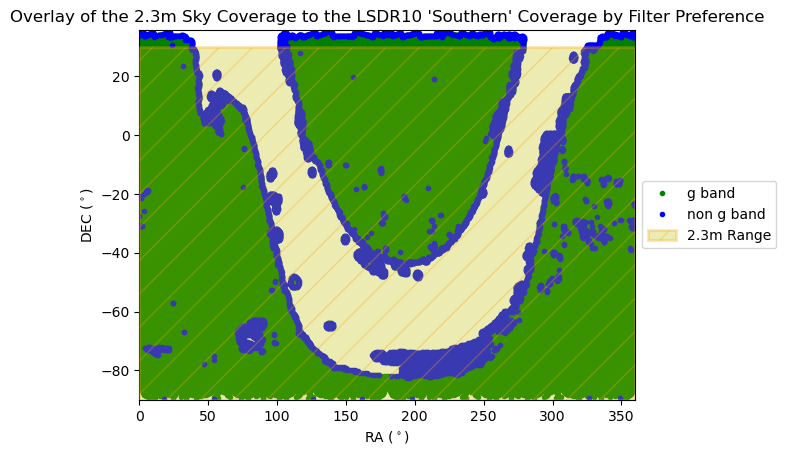

In [18]:
from matplotlib.patches import Rectangle, Circle, CirclePolygon, Wedge
fig, ax = plt.subplots(1,1)
ax.plot(all_bricks['ra'], all_bricks['dec'], 'g.', label="g band")
ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
#ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
#ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
#ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
#ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")
plt.gca().add_patch(Rectangle((0,-90),360,120,
                                  fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=2, zorder=100,
                                figure=fig, label="2.3m Range"))
#fig.patches.extend([plt.Rectangle((0,-90),360,120,facecolor='y',alpha=0.3,hatch='/',linewidth=2,transform=fig.transFigure, figure=fig)])
ax.set(title="Overlay of the 2.3m Sky Coverage to the LSDR10 'Southern' Coverage by Filter Preference", xlabel="RA ($^\circ$)", ylabel="DEC ($^\circ$)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.margins(0)
plt.show()

Better Graph

Text(0, 0.5, 'Dec[deg]')

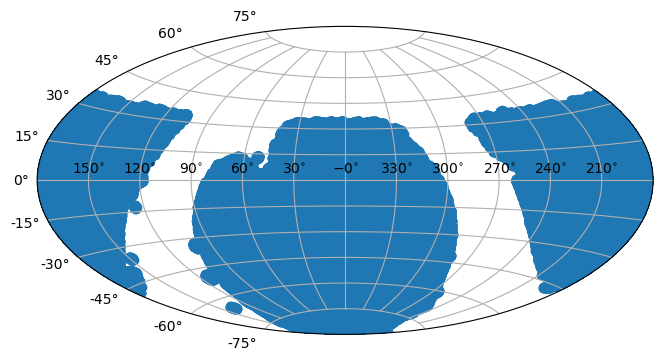

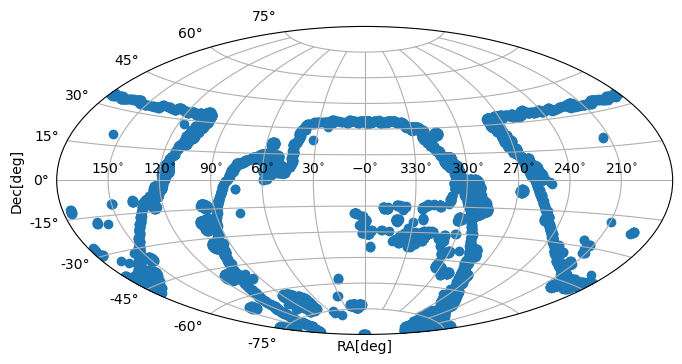

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
import astropy.units as u
g_band=SkyCoord(ra=all_bricks["ra"],dec=all_bricks["dec"],frame='icrs',unit=u.degree)
non_g_band=SkyCoord(ra=non_g_bricks["ra"],dec=non_g_bricks["dec"],frame='icrs',unit=u.degree)
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    
    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian)

    def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()
    
    return fig, ax
fig,ax=coordinates_aitoff_plot(g_band)
fig,ax=coordinates_aitoff_plot(non_g_band)

ax.set_xlabel('RA[deg]')
ax.set_ylabel('Dec[deg]')

Trying to Combine the Two

<function matplotlib.pyplot.show(close=None, block=None)>

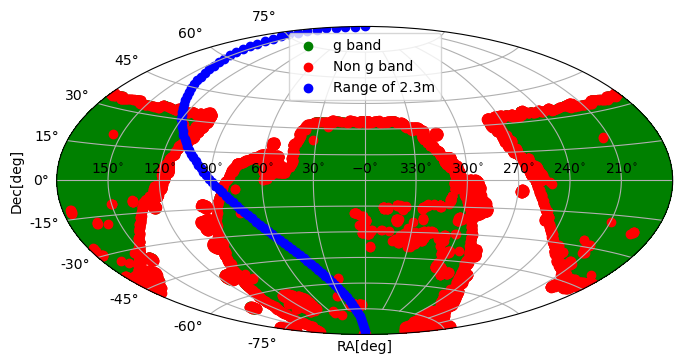

In [77]:
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
import astropy.units as u
g_band=SkyCoord(ra=all_bricks["ra"],dec=all_bricks["dec"],frame='icrs',unit=u.degree)
non_g_band=SkyCoord(ra=non_g_bricks["ra"],dec=non_g_bricks["dec"],frame='icrs',unit=u.degree)
range_23=SkyCoord(ra=np.linspace(0,180,100),dec=np.linspace(-90,90,100),frame='icrs',unit=u.degree)
fig, ax = plt.subplots(figsize=(10, 4), 
        subplot_kw=dict(projection="aitoff"))
sph = g_band.spherical
cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                sph.lat.radian, color='g', label="g band")
def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'
ticker = mpl.ticker.FuncFormatter(fmt_func)
ax.xaxis.set_major_formatter(ticker)
sph1 = non_g_band.spherical
cs1 = ax.scatter(-sph1.lon.wrap_at(180*u.deg).radian,
                sph1.lat.radian,color='r', label="Non g band")
sph2=range_23.spherical
cs2=ax.scatter(-sph2.lon.wrap_at(180*u.deg).radian,
                sph2.lat.radian,color='b', label="Range of 2.3m")
#print(sph1.lat.degree)
#print(sph1.lon.radian)
ax.set_xlabel('RA[deg]')
ax.set_ylabel('Dec[deg]')
ax.legend()
ax.grid()
#plt.fill_between(30, -90, color='y',aplha=0.5)
#point1=[180,30]
#p1=point1.spherical
#point2=[270,30]
#p2=point2.spherical
#plt.plot(point1,'k')
#wedge=Wedge((30, 10), 21, 180, 360, width=12, color='y',alpha=0.3)
#ax.add_artist(wedge)
#plt.gca().add_patch(Rectangle((0,0),300,100,
                                #fill=True,facecolor='y',hatch='/', alpha=0.3, edgecolor='orange',linewidth=2, zorder=100,
                                #figure=fig, label="2.3m Range"))
plt.show
    

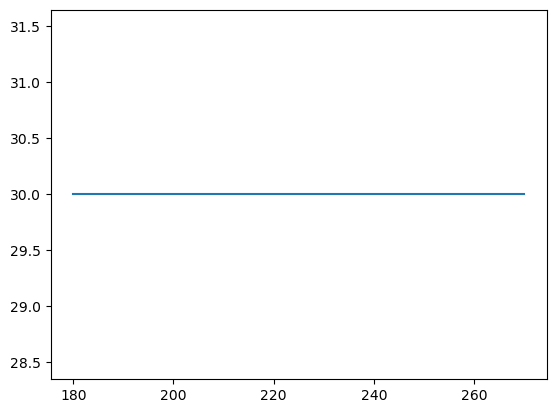

In [68]:
#fig, ax = plt.subplots(1,1)
#wedge=Wedge((.3, .3), 0.12, 200, 360, width=0.10)
#ax.add_artist(wedge)
#plt.show
def hanging_line(point1, point2):
    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

point1=[180,30]
point2=[270,30]
x,y = hanging_line(point1, point2)

plt.plot(x,y)

## FIGURE 2: Electromagnetic Range of the 2.3m to the DES Filters

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## FIGURE 3: Plot that Compares SE Findings to Tractor Objects in that Area

Going to use a 0.25*0.25 Brick (0001m002)

In [127]:
query = f"""
    SELECT ra,dec
    FROM ls_dr10.tractor_s
    WHERE brickname='0001m002'
    """

In [2]:
# get all the brick names and ra/dec of every brick below a declination of 30
# with at least 1 observation in the g filter
# this takes about 15 seconds to get ~337k brick names

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2
        FROM ls_dr10.bricks_s
        WHERE dec <= 30 AND nexp_g >= 1
        """

brick_df = qc.query(sql=query, fmt="pandas")
brick_df

,brickname,ra,ra1,ra2,dec,dec1,dec2
0,0900m897,90.000,72.000,108.000,-89.75,-89.875,-89.625
1,0112m895,11.250,0.000,22.500,-89.50,-89.625,-89.375
2,0337m895,33.750,22.500,45.000,-89.50,-89.625,-89.375
3,0562m895,56.250,45.000,67.500,-89.50,-89.625,-89.375
4,0787m895,78.750,67.500,90.000,-89.50,-89.625,-89.375
...,...,...,...,...,...,...,...
337218,3587p300,358.704,358.560,358.848,30.00,29.875,30.125
337219,3589p300,358.992,358.848,359.136,30.00,29.875,30.125
337220,3592p300,359.280,359.136,359.424,30.00,29.875,30.125
337221,3595p300,359.568,359.424,359.712,30.00,29.875,30.125


In [10]:
# get all the brick names and ra/dec of every brick below a declination of 30
# with NO observations in the g filter
# ~5s for 16k bricks
##AND nexp_g < 1

query = f"""
        SELECT brickname, ra, ra1, ra2, dec, dec1, dec2, nexp_g, nexp_i, nexp_r, nexp_z, wise_nobs_1, wise_nobs_2, wise_nobs_3, wise_nobs_4
        FROM ls_dr10.bricks_s
        WHERE dec <= 30
        """

non_g_bricks = qc.query(sql=query, fmt="pandas")
non_g_bricks

,brickname,ra,ra1,ra2,dec,dec1,dec2,nexp_g,nexp_i,nexp_r,nexp_z,wise_nobs_1,wise_nobs_2,wise_nobs_3,wise_nobs_4
0,0180m897,18.000,0.000,36.000,-89.75,-89.875,-89.625,0,0,0,0,483,485,23,23
1,0540m897,54.000,36.000,72.000,-89.75,-89.875,-89.625,0,0,0,0,490,492,22,23
2,0900m897,90.000,72.000,108.000,-89.75,-89.875,-89.625,1,0,1,0,488,494,22,23
3,1260m897,126.000,108.000,144.000,-89.75,-89.875,-89.625,0,0,0,0,486,495,25,25
4,1620m897,162.000,144.000,180.000,-89.75,-89.875,-89.625,0,0,0,0,455,469,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353107,3587p300,358.704,358.560,358.848,30.00,29.875,30.125,3,0,4,6,243,239,19,19
353108,3589p300,358.992,358.848,359.136,30.00,29.875,30.125,3,0,4,5,239,236,23,23
353109,3592p300,359.280,359.136,359.424,30.00,29.875,30.125,3,0,3,4,238,238,23,24
353110,3595p300,359.568,359.424,359.712,30.00,29.875,30.125,3,0,3,4,244,244,22,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


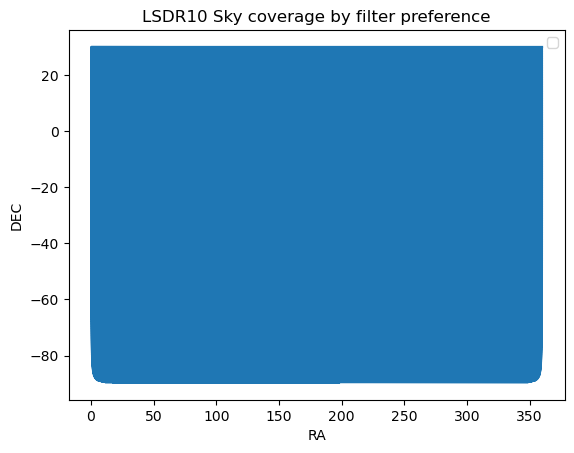

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(non_g_bricks['ra'], non_g_bricks['dec'])
        # 'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
#ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
#ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
#ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
#ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")



ax.set(title="LSDR10 Sky coverage by filter preference", xlabel="RA", ylabel="DEC")
ax.legend()
plt.show()

Almost all of the DR10 bricks have at least one g-band observation associated with them, and those that don't are mostly along the edge of the Milky Way plane and the Magellanic Clouds. Out of the ~16k bricks that aren't accounted for in the g-band, only about 2900 only have WISE (W1, W2, W3, W4) observations that would require different calibration and image processing to handle.

In [115]:
# bricks with r band observations
r_bricks = non_g_bricks[non_g_bricks['nexp_r']!=0]
# no r band, but i band
i_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']!=0)]
# no r or i bands, but z band
z_bricks = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']!=0)]
# no r, i, or z
wise_only = non_g_bricks[(non_g_bricks['nexp_r']==0) & (non_g_bricks['nexp_i']==0) & (non_g_bricks['nexp_z']==0)]
wise_only

,brickname,ra,ra1,ra2,dec,dec1,dec2,nexp_g,nexp_i,nexp_r,nexp_z,wise_nobs_1,wise_nobs_2,wise_nobs_3,wise_nobs_4
0,0180m897,18.000000,0.000000,36.000000,-89.75,-89.875,-89.625,0,0,0,0,483,485,23,23
1,0540m897,54.000000,36.000000,72.000000,-89.75,-89.875,-89.625,0,0,0,0,490,492,22,23
2,1260m897,126.000000,108.000000,144.000000,-89.75,-89.875,-89.625,0,0,0,0,486,495,25,25
3,1620m897,162.000000,144.000000,180.000000,-89.75,-89.875,-89.625,0,0,0,0,455,469,23,23
4,1980m897,198.000000,180.000000,216.000000,-89.75,-89.875,-89.625,0,0,0,0,459,471,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15854,0380p297,38.099042,37.955272,38.242812,29.75,29.625,29.875,0,0,0,0,217,209,24,13
15855,1019p297,101.932907,101.789137,102.076677,29.75,29.625,29.875,0,0,0,0,209,204,12,12
15874,2783p300,278.352000,278.208000,278.496000,30.00,29.875,30.125,0,0,0,0,316,318,22,22
15875,2786p300,278.640000,278.496000,278.784000,30.00,29.875,30.125,0,0,0,0,304,305,20,20


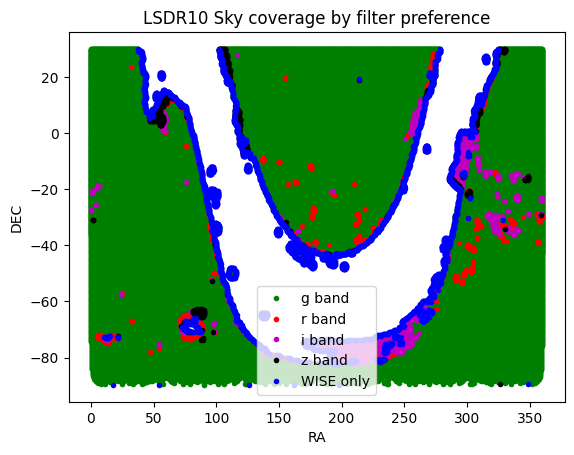

In [114]:
fig, ax = plt.subplots(1,1)
ax.plot(brick_df['ra'], brick_df['dec'], 'g.', label="g band")
# ax.plot(non_g_bricks['ra'], non_g_bricks['dec'], 'b.', label="non g band")
ax.plot(r_bricks['ra'], r_bricks['dec'], 'r.', label="r band")
ax.plot(i_bricks['ra'], i_bricks['dec'], 'm.', label="i band")
ax.plot(z_bricks['ra'], z_bricks['dec'], 'k.', label="z band")
ax.plot(wise_only['ra'], wise_only['dec'], 'b.', label="WISE only")


ax.set(title="LSDR10 Sky coverage by filter preference", xlabel="RA", ylabel="DEC")
ax.legend()
plt.show()

All bricks in the `brick_df` dataframe will have an associated g-band FITS image that can be downloaded from the DR10 website.

Clearing download cache...


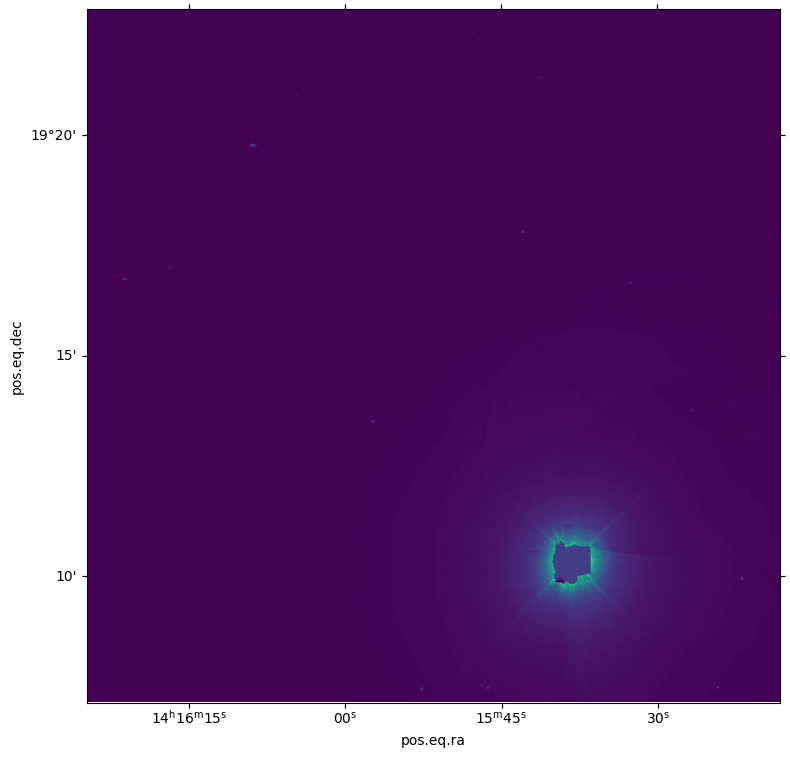

In [116]:
arcturus = "2139p192"
arc_head, arc_data = obtain_image(arcturus, "g", reset_cache=False)
plot_image(arc_head, arc_data)


In [60]:
def iterate_bricks(brick_df):
    """Iterate through a dataframe of brick names and generate the images from them
    """
    
    image_array = []
    
    for brick in brick_df['brickname']:
        print(brick)
        head, data = obtain_image(brick, "g")
        image_array.append((head, data))  
    
    return image_array
        
image_array = iterate_bricks(brick_df)

0900m897
Clearing download cache...
0112m895
Clearing download cache...
0337m895
Clearing download cache...
0562m895
Clearing download cache...
0787m895
Clearing download cache...
1012m895
Clearing download cache...
1237m895
Clearing download cache...
1462m895
Clearing download cache...
1687m895
Clearing download cache...
1912m895
Clearing download cache...


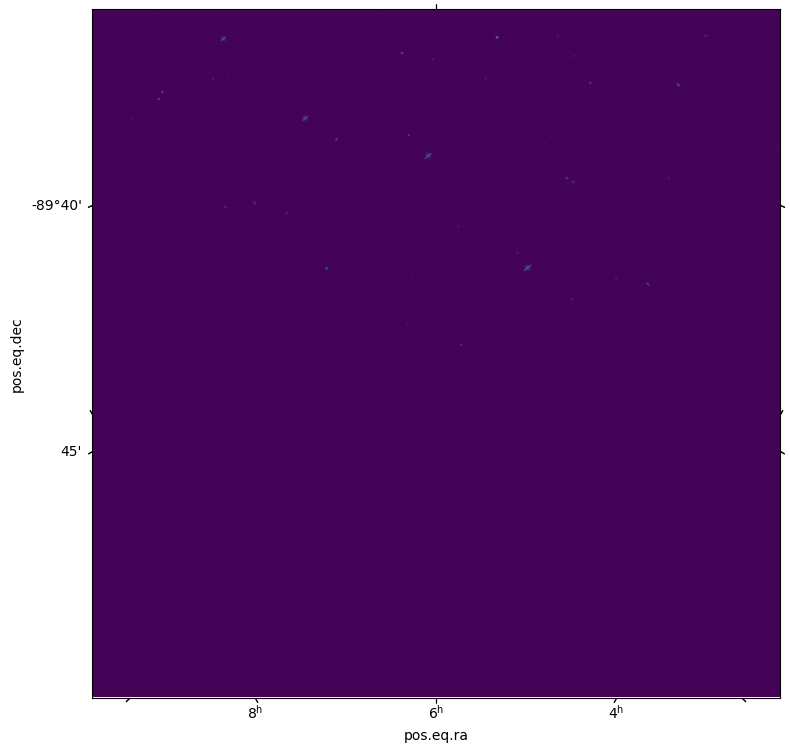

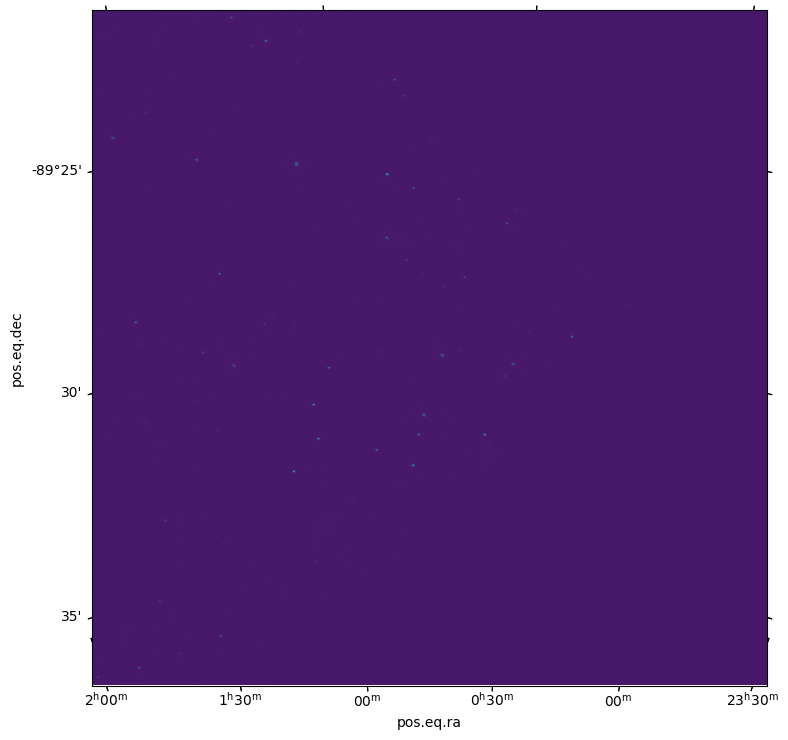

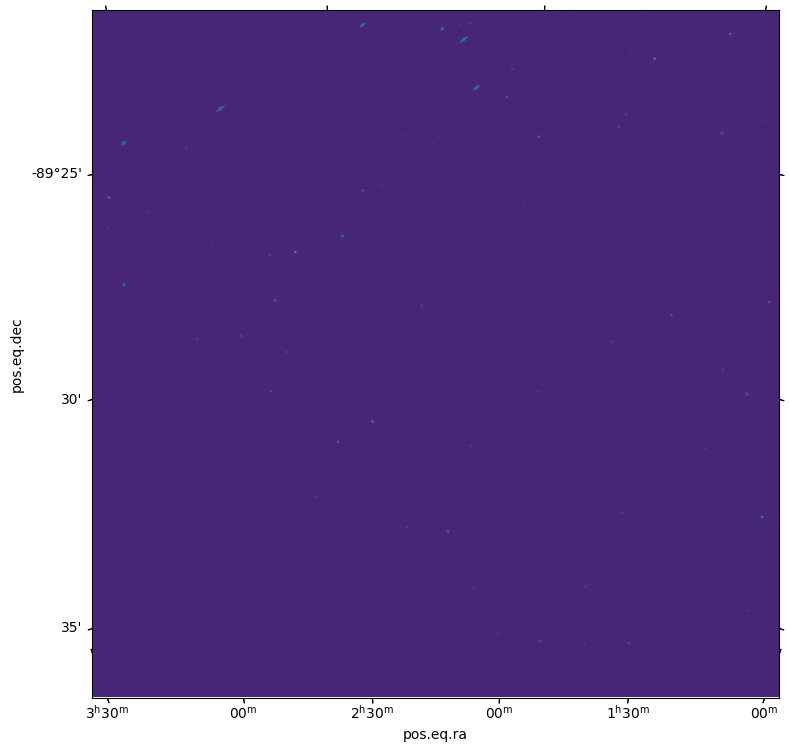

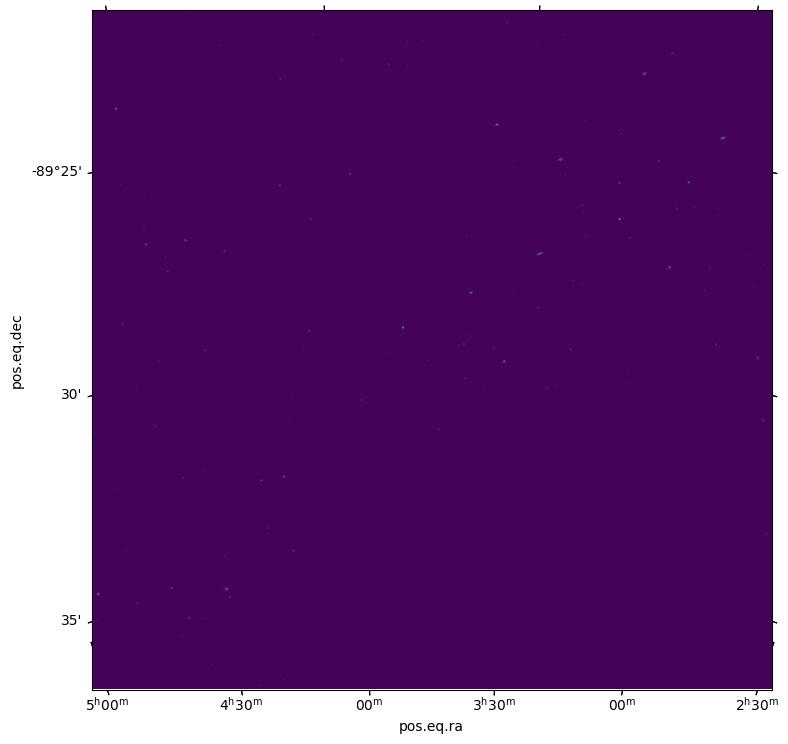

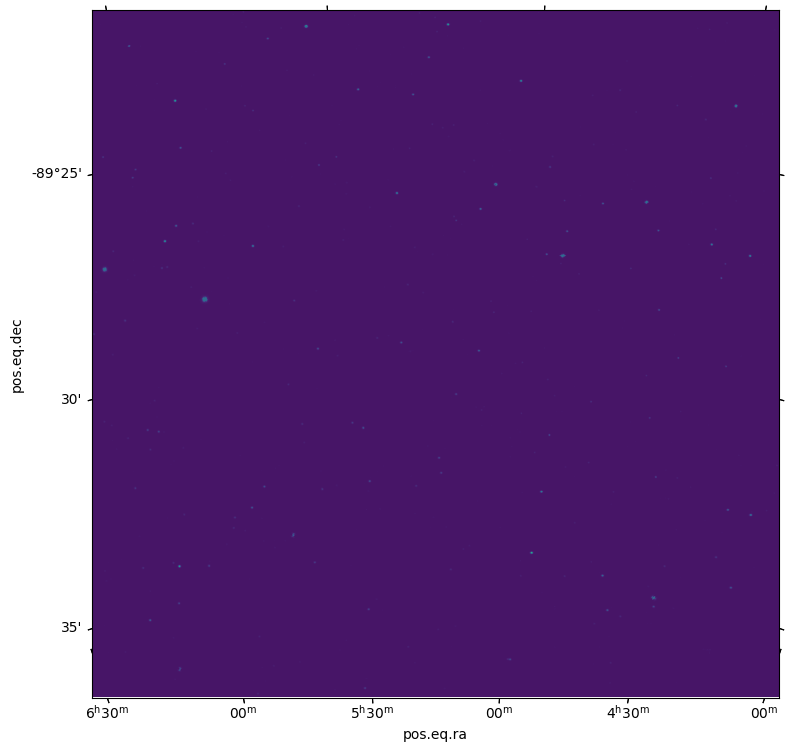

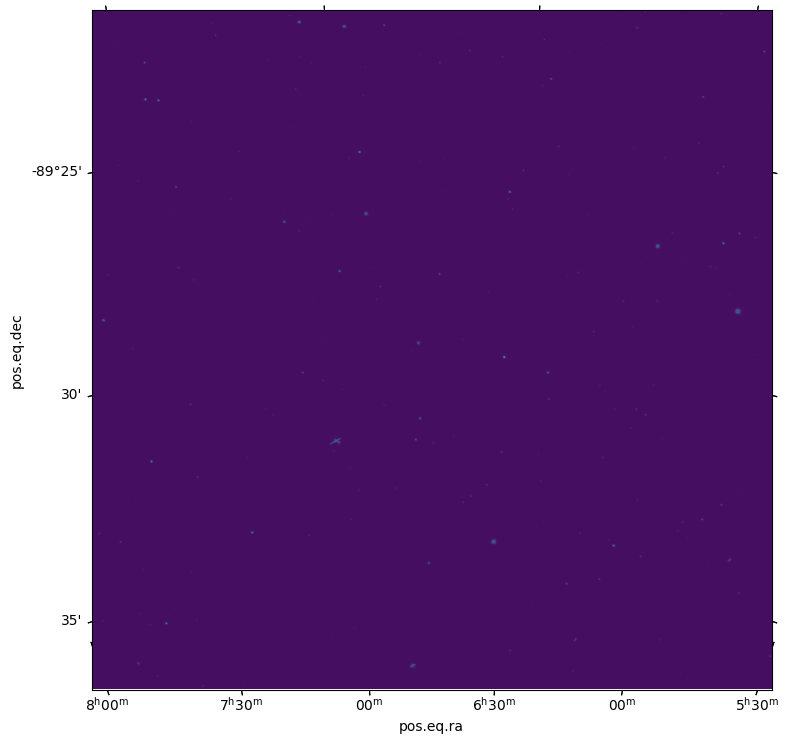

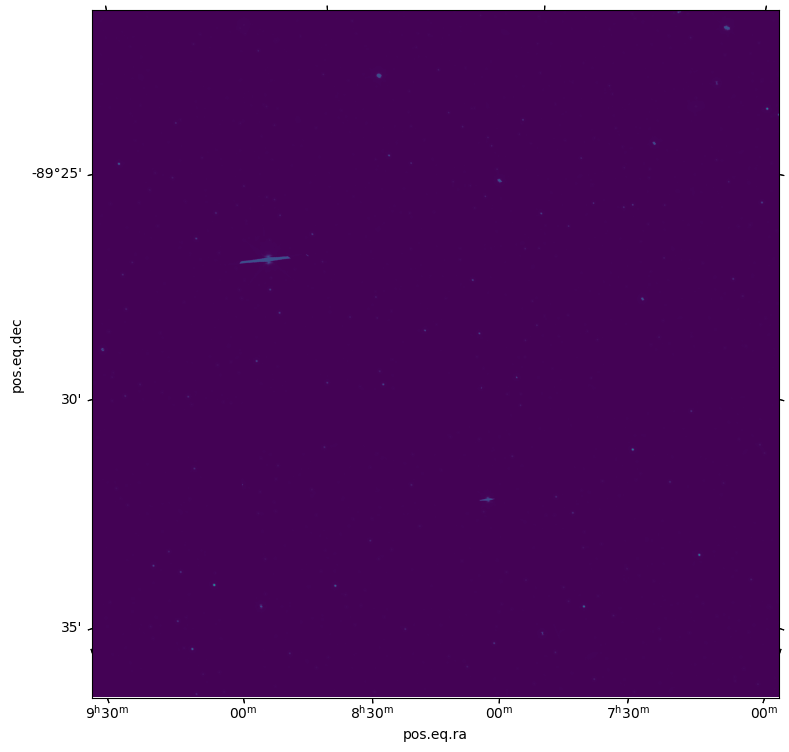

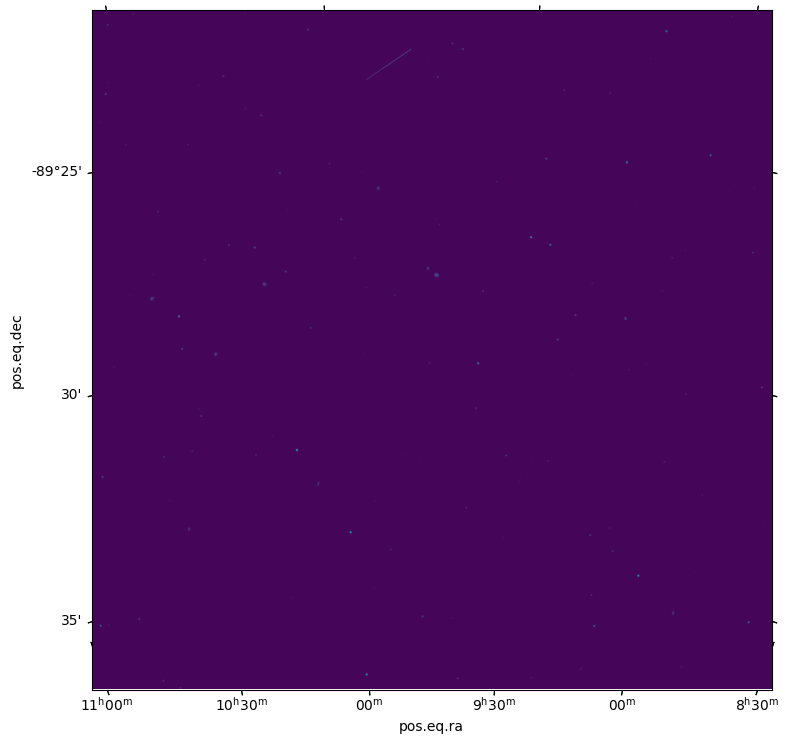

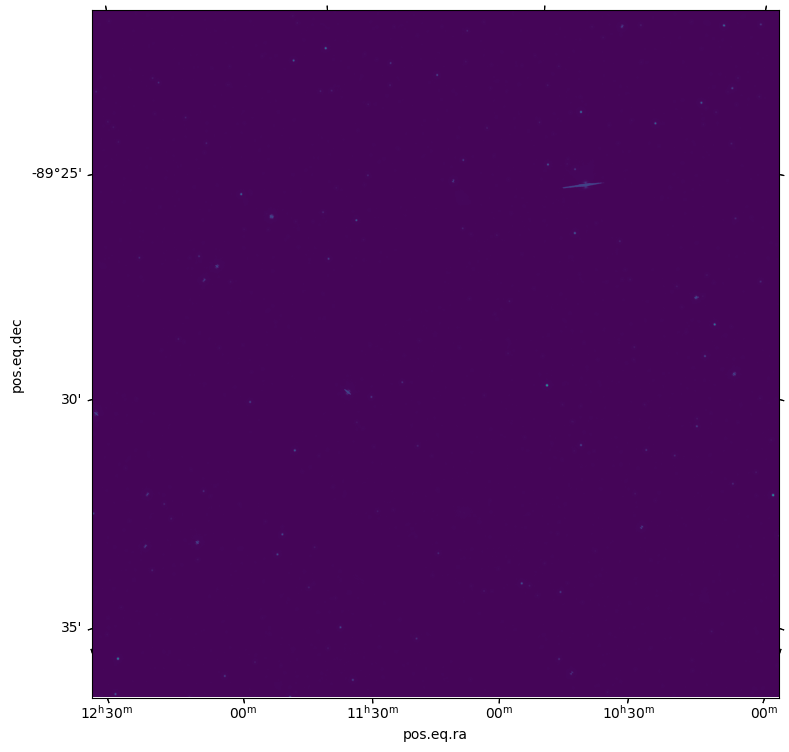

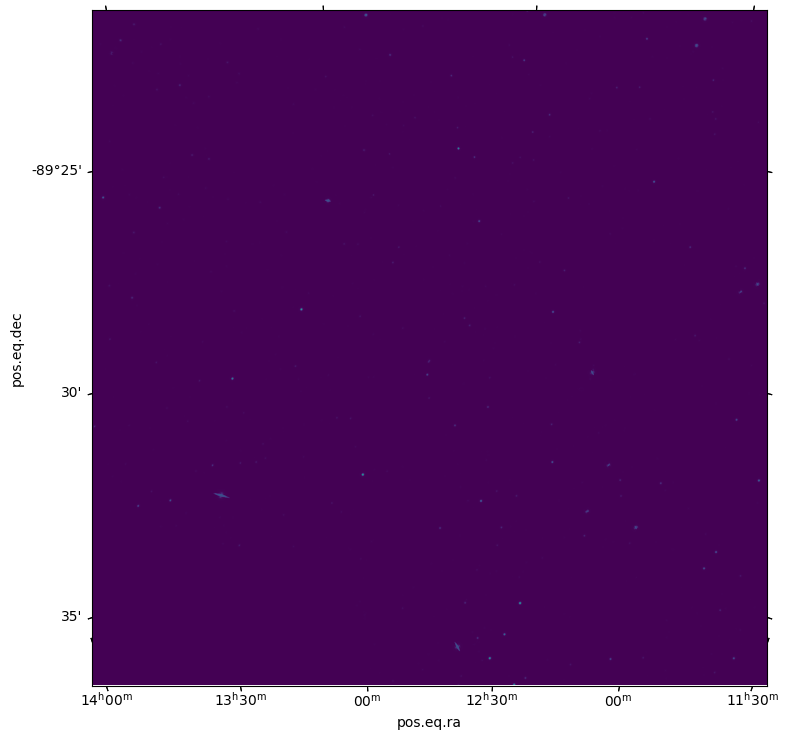

In [61]:
for image in image_array:
    plot_image(image[0], image[1])